# Aprendizado de Máquina - SME0829


## Trabalho 2 - Regressão com métodos não paramétricos

**Grupo**:

Beatriz Carvalho - 10408302<br>
Brunna Quatrochi - 10872833<br>
Gustavo Terra Brandão - 11274935<br>
Lua Nardi Quito - 11371270

In [1]:
#Importando as bibliotecas e o dataset
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
import scipy.stats as st
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded = files.upload()
uploaded

Saving cars.xlsx to cars (1).xlsx


In [78]:
data = pd.read_excel('cars.xlsx', header=None)
data.head(20)

,0,1,2,3,4,5,6,7,8
0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11,70,1,plymouth satellite
4,16,8,304,150,3433,12,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10,70,1,ford galaxie 500
7,14,8,454,220,4354,9,70,1,chevrolet impala
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii
9,14,8,455,225,4425,10,70,1,pontiac catalina


In [2]:
#vamos utilizar a biblioteca pycaret para rodar os modelos 
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 20.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 122 kB 26.8 MB/s 
     |████████████████████████████████| 6.8 MB 31.5 MB/s 
     |████████████████████████████████| 106 kB 41.9 MB/s 
     |████████████████████████████████| 2.0 MB 48.5 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 11.2 MB 42.4 MB/s 
     |████████████████████████████████| 3.3 MB 63.1 MB/s 
     |████████████████████████████████| 281 kB 52.8 MB/s 
     |████████████████████████████████| 9.8 MB 50.0 MB/s 
     |████████████████████████████████| 69 kB 7.0 MB/s 
     |████████████████████████████████| 79.9 MB 106 kB/s 
     |████████████████████████████████| 1.4 MB 33.8 MB/s 
     |████████████████████████████████| 930 kB 45.8 MB/s 
     |██████████████████████████████

In [64]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import jinja2

#Introdução

Trabalhando com o conjunto de dados utilizado anteriormente, ("Auto" do pacote "ISLR" do R), Vamos utilizar métodos não paramétricos para regressão linear para comparar a eficiência dos resultados com os resultados dos modelos paramétricos para concluir qual a melhor técnica a ser usada para predição da variável de interesse: aceleração. 

As co-variáveis a serem analisadas são: weight, horsepower, displacement, cylinders e mpg.

Os dados possuem informações para 392 veículos


#Metodologia

Por serem modelos flexíveis e que se mostram eficientes em diversos tipos de problemas, utilizamos o Random Forest e Boosting para fazer a análise não paramétrica do conjunto de dados.

O random Forest é um modelo em que são criadas árvores de decisão 

Com o Boosting podemos analisar....

#Pre-processamento dos dados

Foi necessário fazer alguns ajustes para conseguir trabalhar com o dataset, visto que ele foi retirado de um pacote presente no software R. Além disso, também foram removidas algumas variáveis irrelevantes para a análise como o ano do carro, modelo e origem. 

In [79]:
#removendo a variavel nome, ja que cada carro tem um nome unico, essa informacao nao eh util para a predicao
data.pop(8)

0                           name
1      chevrolet chevelle malibu
2              buick skylark 320
3             plymouth satellite
4                  amc rebel sst
                 ...            
388              ford mustang gl
389                    vw pickup
390                dodge rampage
391                  ford ranger
392                   chevy s-10
Name: 8, Length: 393, dtype: object

In [80]:
data.columns = ['mpg', 'cylinders','displacement','horsepower','weight','acceleration', "year", "origin"]
data.drop([0], axis=0, inplace=True)

In [81]:
data = data.dropna()

In [82]:
data.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
1,18,8,307,130,3504,12,70,1
2,15,8,350,165,3693,11.5,70,1
3,18,8,318,150,3436,11,70,1
4,16,8,304,150,3433,12,70,1
5,17,8,302,140,3449,10.5,70,1
6,15,8,429,198,4341,10,70,1
7,14,8,454,220,4354,9,70,1
8,14,8,440,215,4312,8.5,70,1
9,14,8,455,225,4425,10,70,1
10,15,8,390,190,3850,8.5,70,1


# Análise Exploratória dos Dados

As variaveis cylinders e year sao discretas. Origin sera tratada como categorica, podendo assumir os valores 1,2,3 e o restante eh continua

In [13]:
import statistics
np.unique(data["cylinders"])

array([3, 4, 5, 6, 8], dtype=object)

In [14]:
np.unique(data["year"])

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=object)

In [15]:
np.unique(data["origin"])

array([1, 2, 3], dtype=object)

In [50]:
#transformar as variaveis em numericas
data = data.astype({'mpg':'float'})
data = data.astype({'cylinders':'float'})
data = data.astype({'displacement':'float'})
data = data.astype({'horsepower':'float'})
data = data.astype({'weight':'float'})
data = data.astype({'acceleration':'float'})
data = data.astype({'year':'float'})
data = data.astype({'origin':'float'})
data[['mpg','displacement','horsepower','weight','acceleration']].describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


In [22]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year             object
origin           object
dtype: object

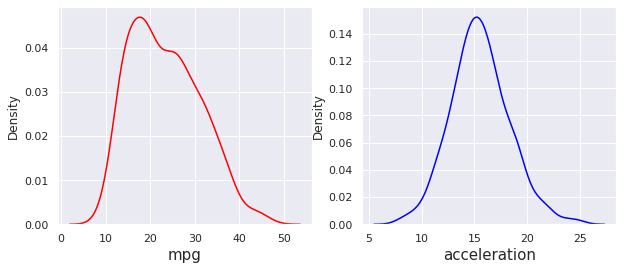

In [23]:
sns.set_theme(style = "darkgrid")
plt.figure(figsize = (10,4))
plt.subplot(121); sns.kdeplot(data = data, x = "mpg", color = "red")
plt.xlabel("mpg", fontsize = 15)
plt.subplot(122); sns.kdeplot(data = data, x = "acceleration", color = "blue")
plt.xlabel("acceleration", fontsize = 15)
plt.show()

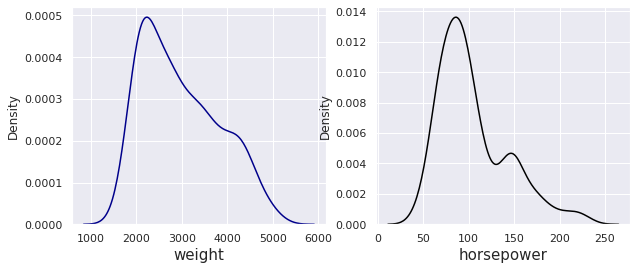

In [24]:
plt.figure(figsize = (10,4))
plt.subplot(121); sns.kdeplot(data = data, x = "weight", color = "darkblue")
plt.xlabel("weight", fontsize = 15)
plt.subplot(122); sns.kdeplot(data = data, x = "horsepower", color = "black")
plt.xlabel("horsepower", fontsize = 15)
plt.show()

<function matplotlib.pyplot.show>

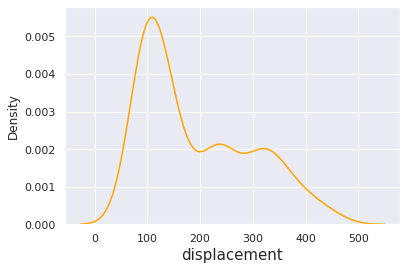

In [25]:
plt.plot;sns.kdeplot(data = data, x = "displacement", color = "orange")
plt.xlabel("displacement", fontsize = 15)
plt.show

In [ ]:
data["cylinders"].value_counts()

4.0    199
8.0    103
6.0     83
3.0      4
5.0      3
Name: cylinders, dtype: int64

In [26]:
data["year"].value_counts()

73    40
78    36
76    34
75    30
82    30
70    29
79    29
72    28
77    28
81    28
71    27
80    27
74    26
Name: year, dtype: int64

In [27]:
data["origin"].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

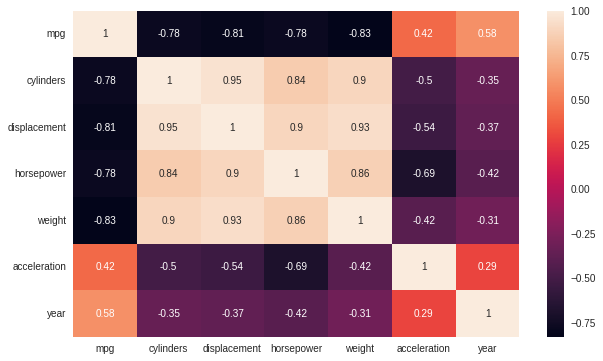

In [39]:
plt.subplots(figsize = (10 ,6))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [32]:
data[['mpg', 'cylinders','displacement','horsepower','weight','acceleration']].corr("pearson")

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


<Figure size 144x144 with 0 Axes>

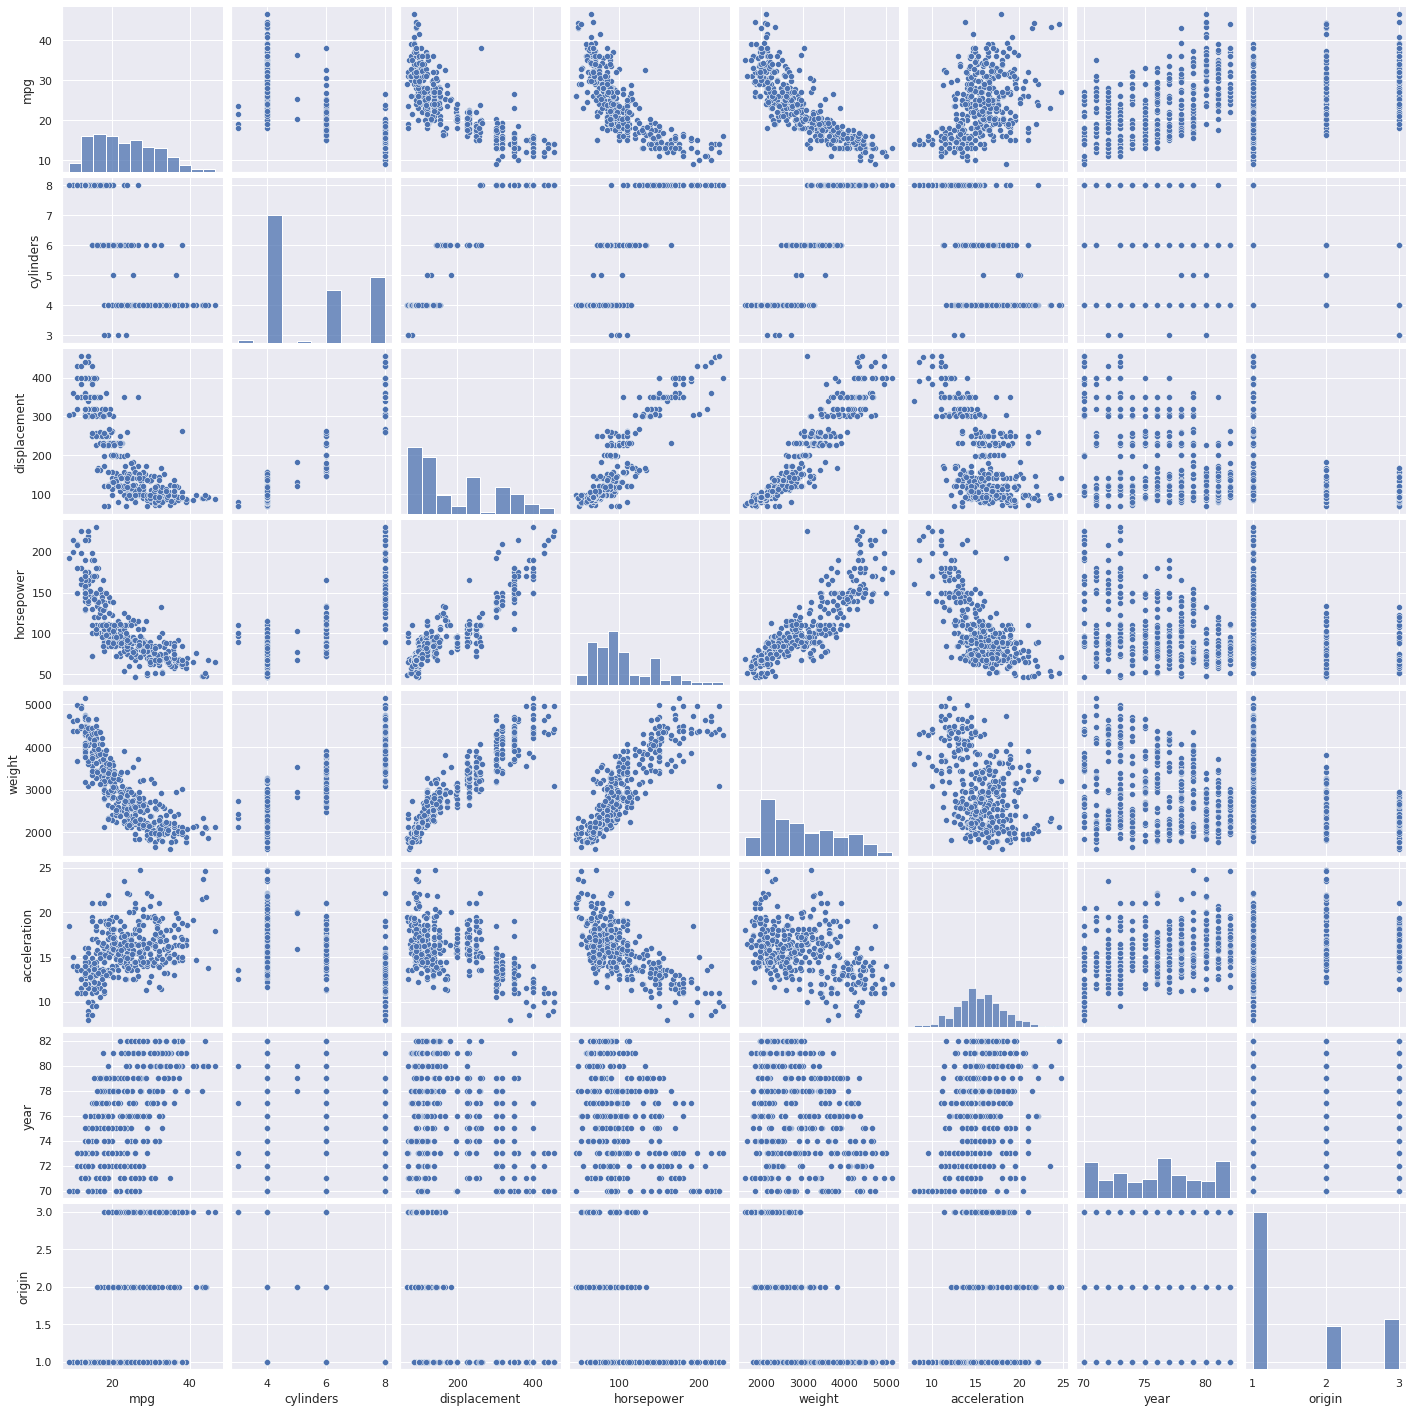

In [33]:
plt.figure(figsize= (2,2))
sns.pairplot(data = data)
plt.show()

# Modelagem

In [37]:
from pycaret.regression import * 

In [107]:
#Separando os grupos de teste e de treino
y = data['acceleration']
X = data.loc[:, data.columns != 'acceleration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
data = data.astype(float)

In [87]:
s = setup(data, target = "acceleration", train_size = 0.8)

,Description,Value
0,Session id,1998
1,Target,acceleration
2,Target type,Regression
3,Data shape,"(392, 8)"
4,Train data shape,"(313, 8)"
5,Test data shape,"(79, 8)"
6,Numeric features,7
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [90]:
#o pycaret ja executa automaticamente k-fold cross validation com 10 folds
compare_models(exclude = ['et','lightgbm','en','br','lar','huber', 'omp','llar','dummy','par', 'gbr']) #removi os modelos que nao foram estudados em aula

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.1695,2.4050,1.5283,0.6465,0.0926,0.0758,0.2560
lasso,Lasso Regression,1.3265,2.8848,1.6783,0.5794,0.1037,0.0861,0.0260
ridge,Ridge Regression,1.3425,2.9468,1.6980,0.5702,0.1056,0.0873,0.0250
lr,Linear Regression,1.3426,2.9474,1.6981,0.5701,0.1057,0.0873,0.0260
ada,AdaBoost Regressor,1.3352,2.9596,1.7081,0.5671,0.1026,0.0872,0.0840
dt,Decision Tree Regressor,1.5397,4.1019,1.9980,0.4055,0.1196,0.0993,0.0250
knn,K Neighbors Regressor,1.6856,4.7765,2.1714,0.3223,0.1307,0.1101,0.0720


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=1998)

In [91]:
rfr = create_model('rf') #os folds

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2328,2.2333,1.4944,0.6764,0.0844,0.0770
1,1.2349,2.5617,1.6005,0.6203,0.1049,0.0888
2,0.7931,1.0802,1.0393,0.7668,0.0642,0.0517
3,1.3966,4.3606,2.0882,0.1428,0.1369,0.0867
4,1.2677,3.1066,1.7626,0.6332,0.1124,0.0865
5,1.1111,1.7130,1.3088,0.7535,0.0800,0.0731
6,1.1682,2.4399,1.5620,0.7343,0.0885,0.0707
7,1.2205,2.0790,1.4419,0.7095,0.0902,0.0837
8,1.0253,1.9444,1.3944,0.8050,0.0737,0.0616


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [93]:
tuned = tune_model(rfr) #definir os melhores parametros de afinacao atravez da Cross Validation

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3550,2.7186,1.6488,0.6061,0.0910,0.0834
1,1.3353,2.9355,1.7133,0.5649,0.1159,0.0984
2,0.8264,1.1325,1.0642,0.7555,0.0609,0.0528
3,1.3863,3.8785,1.9694,0.2376,0.1226,0.0860
4,1.4359,3.5565,1.8859,0.5800,0.1177,0.0962
5,1.3926,2.5479,1.5962,0.6333,0.0982,0.0917
6,1.2428,2.9981,1.7315,0.6735,0.0940,0.0733
7,1.3193,2.7754,1.6660,0.6122,0.1041,0.0911
8,1.1870,3.0213,1.7382,0.6969,0.0891,0.0680


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


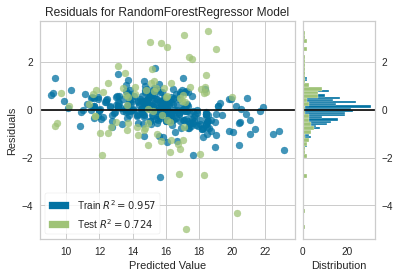

In [95]:
plot_model(tuned)

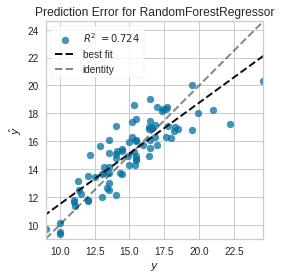

In [96]:
plot_model(tuned, plot = 'error')

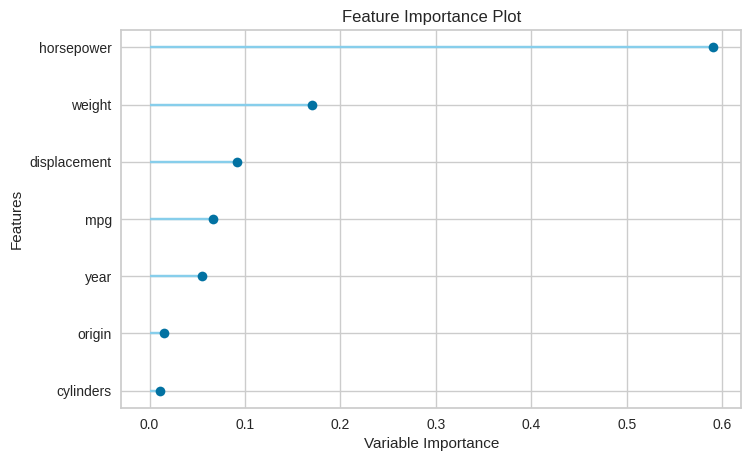

In [97]:
plot_model(tuned,plot = "feature")

In [98]:
predict_model(tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.1689,2.2403,1.4968,0.7236,0.0865,0.0763


,mpg,cylinders,displacement,horsepower,weight,year,origin,acceleration,Label
313,26.000000,4.0,98.0,90.0,2265.0,73.0,2.0,15.500000,16.066
314,30.000000,4.0,135.0,84.0,2385.0,81.0,1.0,12.900000,15.686
315,28.799999,6.0,173.0,115.0,2595.0,79.0,1.0,11.300000,13.123
316,31.000000,4.0,91.0,68.0,1970.0,82.0,3.0,17.600000,16.320
317,44.000000,4.0,97.0,52.0,2130.0,82.0,2.0,24.600000,20.294
...,...,...,...,...,...,...,...,...,...
387,24.000000,4.0,113.0,95.0,2278.0,72.0,3.0,15.500000,14.735
388,25.000000,6.0,181.0,110.0,2945.0,82.0,1.0,16.400000,14.938
389,37.700001,4.0,89.0,62.0,2050.0,81.0,3.0,17.299999,18.142
390,24.000000,6.0,200.0,81.0,3012.0,76.0,1.0,17.600000,18.304


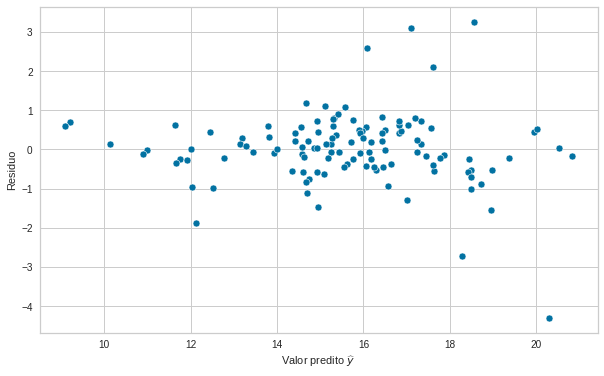

In [99]:
previsao = predict_model(tuned,X_test)["Label"]
residuo = previsao - y_test
plt.figure(figsize = (10,6))
sns.scatterplot(x = previsao,y = residuo)
plt.xlabel("Valor predito $\widehat{y}$")
plt.ylabel("Residuo")
plt.show()

In [100]:
lasso = create_model('lasso') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5187,3.3560,1.8319,0.5137,0.1049,0.0942
1,1.1925,1.9032,1.3796,0.7179,0.0873,0.0816
2,1.1316,1.7193,1.3112,0.6288,0.0857,0.0774
3,1.5431,4.6222,2.1499,0.0914,0.1398,0.0976
4,1.5153,4.1784,2.0441,0.5066,0.1232,0.1000
5,1.2121,2.0933,1.4468,0.6987,0.0884,0.0793
6,1.3617,2.8230,1.6802,0.6925,0.1086,0.0858
7,1.2126,2.3526,1.5338,0.6713,0.1133,0.0879
8,1.1685,2.8184,1.6788,0.7173,0.0853,0.0662


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [117]:
LASSO = tune_model(lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5269,3.4082,1.8461,0.5061,0.1048,0.0944
1,1.2000,1.9236,1.3869,0.7149,0.0869,0.0822
2,1.1279,1.6829,1.2973,0.6366,0.0839,0.0770
3,1.5341,4.5276,2.1278,0.1100,0.1374,0.0969
4,1.5135,4.1824,2.0451,0.5061,0.1235,0.1001
5,1.2392,2.1603,1.4698,0.6891,0.0899,0.0811
6,1.3593,2.8017,1.6738,0.6949,0.1050,0.0850
7,1.2084,2.3136,1.5210,0.6768,0.1090,0.0872
8,1.1789,2.9210,1.7091,0.7070,0.0865,0.0663


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [101]:
ridge = create_model('ridge') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4738,3.1854,1.7848,0.5384,0.1022,0.0915
1,1.2154,2.0127,1.4187,0.7016,0.0895,0.0828
2,1.1572,1.8338,1.3542,0.6040,0.0885,0.0799
3,1.5518,4.7353,2.1761,0.0691,0.1431,0.0977
4,1.5186,4.2509,2.0618,0.4980,0.1240,0.0999
5,1.2002,2.0670,1.4377,0.7025,0.0883,0.0789
6,1.3683,2.8640,1.6923,0.6881,0.1090,0.0867
7,1.3219,2.7050,1.6447,0.6221,0.1248,0.0961
8,1.2595,2.9630,1.7213,0.7028,0.0884,0.0721


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [120]:
RIDGE = tune_model(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4751,3.1868,1.7852,0.5382,0.1023,0.0916
1,1.2166,2.0148,1.4194,0.7013,0.0896,0.0829
2,1.1558,1.8322,1.3536,0.6044,0.0886,0.0798
3,1.5489,4.7115,2.1706,0.0738,0.1425,0.0976
4,1.5182,4.2451,2.0604,0.4987,0.1239,0.0999
5,1.2011,2.0634,1.4364,0.7030,0.0881,0.0789
6,1.3676,2.8627,1.6920,0.6882,0.1092,0.0867
7,1.3213,2.7059,1.6450,0.6219,0.1249,0.0961
8,1.2540,2.9491,1.7173,0.7042,0.0882,0.0718


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [102]:
MQ = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4736,3.1852,1.7847,0.5384,0.1022,0.0915
1,1.2152,2.0124,1.4186,0.7017,0.0895,0.0828
2,1.1574,1.8340,1.3543,0.6040,0.0885,0.0799
3,1.5522,4.7385,2.1768,0.0685,0.1432,0.0978
4,1.5186,4.2517,2.0620,0.4979,0.1240,0.0999
5,1.2001,2.0675,1.4379,0.7024,0.0883,0.0789
6,1.3684,2.8642,1.6924,0.6880,0.1090,0.0867
7,1.3220,2.7049,1.6447,0.6221,0.1248,0.0961
8,1.2602,2.9649,1.7219,0.7026,0.0885,0.0722


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [110]:
boost = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3881,2.6949,1.6416,0.6095,0.0928,0.0874
1,1.2776,2.7939,1.6715,0.5858,0.1086,0.0923
2,1.1211,1.8604,1.3640,0.5983,0.0811,0.0735
3,1.3711,4.2392,2.0589,0.1667,0.1312,0.0871
4,1.5427,4.1761,2.0435,0.5069,0.1318,0.1068
5,1.5206,2.9674,1.7226,0.5729,0.1028,0.0984
6,1.1656,2.2826,1.5108,0.7514,0.0838,0.0702
7,1.3387,2.5841,1.6075,0.6390,0.1035,0.0944
8,1.1582,2.7568,1.6603,0.7235,0.0856,0.0672


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [103]:
#Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [121]:
#Métricas dos modelos nos dados de Teste
modelos = [LASSO, RIDGE, MQ, rfr , boost]
sigla = ["Lasso", "Ridge","Minimos quadrados", "RandomForest", "Boosting"]

for modelo,sigla in zip(modelos,sigla):
    ypred = predict_model(modelo,data = X_test)
    res_test = [mean_absolute_error(y_test, ypred["Label"]), mean_squared_error(y_test, ypred["Label"]),
                r2_score(y_test, ypred["Label"])]
    
    dic_results = res_test; DF = pd.DataFrame(dic_results).T; DF.columns = ["EAM",  "EQM","R²"]
    print("Resultados modelo: {}".format(sigla))
    print(round(DF, 3), end = "\n\n")

Resultados modelo: Lasso
     EAM    EQM     R²
0  1.262  2.696  0.573



Resultados modelo: Ridge
     EAM    EQM     R²
0  1.263  2.701  0.572



Resultados modelo: Minimos quadrados
     EAM    EQM     R²
0  1.263  2.699  0.572



Resultados modelo: RandomForest
     EAM    EQM     R²
0  0.563  0.725  0.885



Resultados modelo: Boosting
     EAM    EQM     R²
0  1.171  2.104  0.667

